Continuation of the Covid-19 analysis

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime
import warnings
 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

Let's import the data

In [2]:
df = pd.read_csv(r'C:\Users\agrae\Documents\AAA_Work\Coding\Springboard\HW\000_Capstone_2\Data\Clean_DF.csv')
df.drop('Unnamed: 0', inplace=True, axis=1)
df.head()

,Week Ending Date,COVID-19 Deaths,State,total_covid_deaths,GDP_millions,Republican,perc_pop_obese,pop_size,perc_pop_urban
0,01/04/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0
1,01/11/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0
2,01/18/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0
3,01/25/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0
4,02/01/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0


Let's make the names a bit more managable

In [3]:
df.rename({'Week Ending Date':'Week', 'COVID-19 Deaths':'Deaths'}, inplace=True, axis=1)
df.head()

,Week,Deaths,State,total_covid_deaths,GDP_millions,Republican,perc_pop_obese,pop_size,perc_pop_urban
0,01/04/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0
1,01/11/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0
2,01/18/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0
3,01/25/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0
4,02/01/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0


Let's make some new columns that normalize the data before visualizing it. We'll do that by dividing total_covid_deaths, Deaths, and GDP by pop_size so that we can get a clearer picture of how states are doing per capita.

In [4]:
df['GDP_norm'] = df.GDP_millions/df.pop_size
df['Deaths_norm'] = df.Deaths/df.pop_size
df['total_deaths_norm'] = df.total_covid_deaths/df.pop_size
df.head()

,Week,Deaths,State,total_covid_deaths,GDP_millions,Republican,perc_pop_obese,pop_size,perc_pop_urban,GDP_norm,Deaths_norm,total_deaths_norm
0,01/04/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0,46.531231,0.0,0.0
1,01/11/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0,46.531231,0.0,0.0
2,01/18/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0,46.531231,0.0,0.0
3,01/25/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0,46.531231,0.0,0.0
4,02/01/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0,46.531231,0.0,0.0


Let's see what kind of corrilations we can find and then plot them.

<AxesSubplot:>

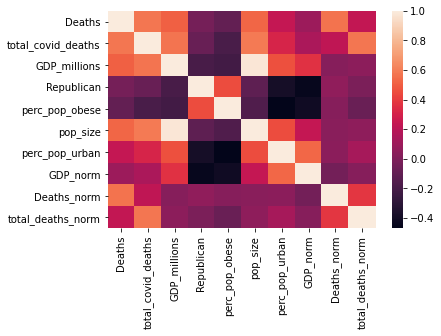

In [5]:
sns.heatmap(data=df.corr())

This is at least a good sanity check. We can see that Republican states are usually negatively corrilated with the percentage of the population that is urban. Let's plot total deaths over time and normalize the total deaths with population size after we change the Week column into a datetime object.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Week                3400 non-null   object 
 1   Deaths              3400 non-null   float64
 2   State               3400 non-null   object 
 3   total_covid_deaths  3400 non-null   float64
 4   GDP_millions        3400 non-null   float64
 5   Republican          3400 non-null   int64  
 6   perc_pop_obese      3400 non-null   float64
 7   pop_size            3400 non-null   int64  
 8   perc_pop_urban      3400 non-null   float64
 9   GDP_norm            3400 non-null   float64
 10  Deaths_norm         3400 non-null   float64
 11  total_deaths_norm   3400 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 318.9+ KB


In [7]:
df['Week'] = pd.to_datetime(df.Week)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Week                3400 non-null   datetime64[ns]
 1   Deaths              3400 non-null   float64       
 2   State               3400 non-null   object        
 3   total_covid_deaths  3400 non-null   float64       
 4   GDP_millions        3400 non-null   float64       
 5   Republican          3400 non-null   int64         
 6   perc_pop_obese      3400 non-null   float64       
 7   pop_size            3400 non-null   int64         
 8   perc_pop_urban      3400 non-null   float64       
 9   GDP_norm            3400 non-null   float64       
 10  Deaths_norm         3400 non-null   float64       
 11  total_deaths_norm   3400 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 318.9+ KB


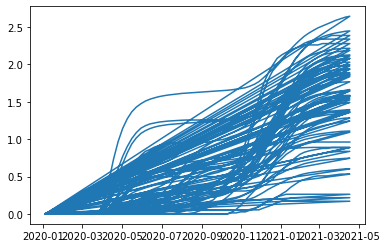

In [8]:
x = df.Week
plt.plot(x, df.total_deaths_norm)

<AxesSubplot:xlabel='Week', ylabel='total_deaths_norm'>

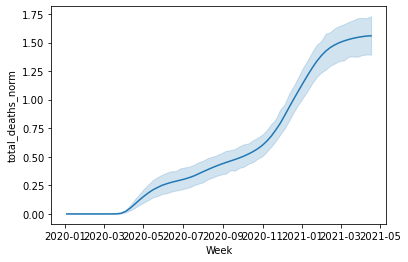

In [9]:
sns.lineplot(x=x, y=df.total_deaths_norm)

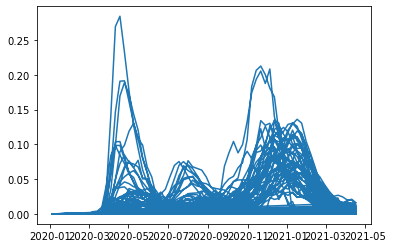

In [10]:
plt.plot(x, df.Deaths_norm)

<AxesSubplot:xlabel='Week', ylabel='Deaths_norm'>

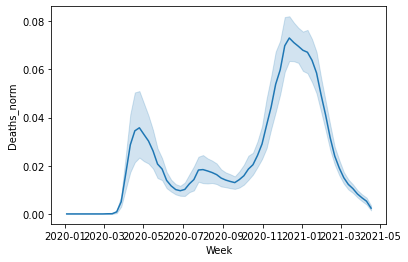

In [11]:
sns.lineplot(x=x, y=df.Deaths_norm)

<AxesSubplot:xlabel='Week', ylabel='Deaths_norm'>

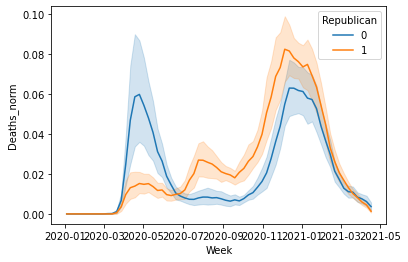

In [12]:
sns.lineplot(x='Week', y='Deaths_norm', hue='Republican', data=df)

<AxesSubplot:xlabel='Week', ylabel='total_deaths_norm'>

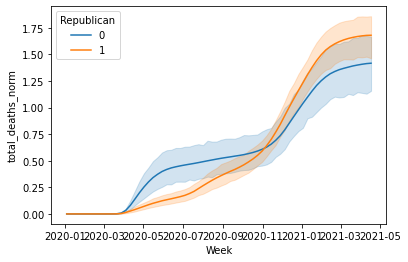

In [13]:
sns.lineplot(x='Week', y='total_deaths_norm', data=df, hue='Republican')

Interesting! Here we can see that states that voted Democrat had for more deaths in the initial surge of the Covid Virus but did better in the second surge. It looks like overall, Republicans are doing worse in terms of total deaths when adjusted for population size.

<AxesSubplot:xlabel='Week', ylabel='total_deaths_norm'>

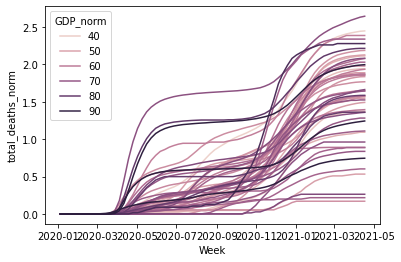

In [14]:
sns.lineplot(x='Week', y='total_deaths_norm', data=df, hue='GDP_norm')

This looks a little messy. Let's add a column discerning low GDP vs high GDP. We do this by finding the median GDP and making a column with a '1' for every state with a GDP above the median and a '0' for every state below the median.

In [15]:
median = np.median(df.GDP_norm.unique())

In [16]:
df['High_GDP'] = (df.GDP_norm >= median).astype(int)
df.head()

,Week,Deaths,State,total_covid_deaths,GDP_millions,Republican,perc_pop_obese,pop_size,perc_pop_urban,GDP_norm,Deaths_norm,total_deaths_norm,High_GDP
0,2020-01-04,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0,46.531231,0.0,0.0,0
1,2020-01-11,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0,46.531231,0.0,0.0,0
2,2020-01-18,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0,46.531231,0.0,0.0,0
3,2020-01-25,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0,46.531231,0.0,0.0,0
4,2020-02-01,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0,46.531231,0.0,0.0,0


<AxesSubplot:xlabel='Week', ylabel='total_deaths_norm'>

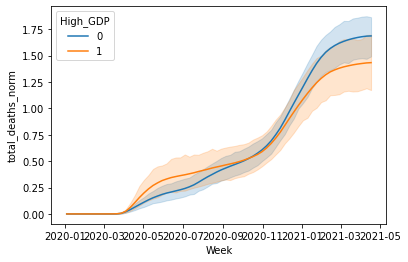

In [17]:
sns.lineplot(x='Week', y='total_deaths_norm', data=df, hue='High_GDP')

It looks like over all, higher GDP per capita results in lower numbers of deaths

In [18]:
df_rep = df[df.Republican == 1]
df_rep_rich = df_rep[df_rep.High_GDP == 1]
df_rep_rich.shape[0]/68

8.0

We can see that only 8 out of the 27 Republican states have a high GDP per capita as opposed to the 17 out of 23 Democratic states, so that seems to correlates with a lowering of deaths too. 

Now let us see how accurately we can predict the total number of covid deaths based purely on our other variables. We're only looking at the current total number of deaths. As such let's make a new dataframe that has only the current number of deaths and the normalized numbers

In [19]:
df_end = df.iloc[67::68, :]
df_end = df_end[['Week', 'State', 'Republican', 'perc_pop_obese', 'pop_size', 'perc_pop_urban', 'GDP_norm', 'Deaths_norm', 'total_deaths_norm']]
df_end.head()

,Week,State,Republican,perc_pop_obese,pop_size,perc_pop_urban,GDP_norm,Deaths_norm,total_deaths_norm
67,2021-04-17,Alabama,1,36.1,4903,59.0,46.531231,0.002040,2.112176
135,2021-04-17,Alaska,1,30.5,731,66.0,74.398803,0.000000,0.262654
203,2021-04-17,Arizona,1,31.4,7278,89.8,50.854507,0.003710,2.125309
271,2021-04-17,Arkansas,1,37.4,3017,56.2,43.405403,0.000000,1.938349
339,2021-04-17,California,0,26.2,39512,95.0,79.287320,0.000911,1.584911


<AxesSubplot:>

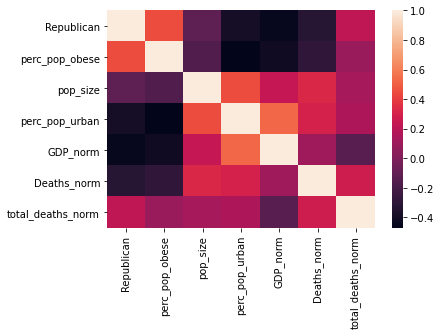

In [20]:
sns.heatmap(data=df_end.corr())

<AxesSubplot:xlabel='total_deaths_norm', ylabel='Count'>

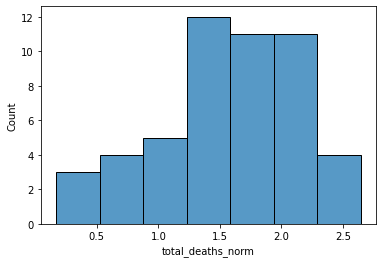

In [21]:
sns.histplot(df_end.total_deaths_norm)

Now let's export our data and get it ready for modeling.

In [22]:
df_end.to_csv(r'C:\Users\agrae\Documents\AAA_Work\Coding\Springboard\HW\000_Capstone_2\Data\DF_end.csv')

<AxesSubplot:xlabel='Week', ylabel='Deaths_norm'>

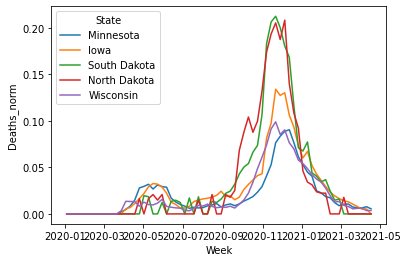

In [31]:
df_min = df[df['State'] == 'Minnesota']
df_iwo = df[df['State'] == 'Iowa']
df_SD = df[df['State'] == 'South Dakota']
df_ND = df[df['State'] == 'North Dakota']
df_wis = df[df['State'] == 'Wisconsin']
df_rach = df_min.append([df_iwo, df_SD, df_ND, df_wis])

sns.lineplot(x='Week', y='Deaths_norm', data=df_rach, hue='State')

<AxesSubplot:xlabel='Week', ylabel='total_deaths_norm'>

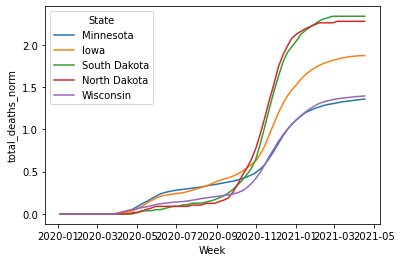

In [32]:
sns.lineplot(x='Week', y='total_deaths_norm', data=df_rach, hue='State')